# INSIGHT 심화세션 사전과제
## 03. 딥러닝 ② Focus on SEQUENCE

## <span style="background-color:#F993C0; color:#311d26; padding:4px; border-radius:0px;"> RNN </span>

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> 순차 데이터란? </span>

<span style="color:#f993c0;"> 순차 데이터의 정의 </span>

순서에 의미가 있으며, 순서가 달라질 경우 의미가 손상되는 데이터

<span style="color:#f993c0;"> 순차 데이터의 예시</span>

1. 음성 및 오디오 데이터
    - 소리의 파형은 시간에 따라 연속적으로 변화하는 순차 데이터
2. 자연어
    - 문장, 단락, 문서 등 단어의 순서가 매우 중요한 대표적인 순차 데이터
3. 생물학적 서열 데이터
    - DNA, 단백질 서열처럼 특정 순서로 배열된 순차 데이터
4. 비디오 데이터
    - 여러 이미지 프레임이 순서대로 나열된 형태의 순차 데이터

<span style="color:#f993c0;"> 정형 데이터와의 차이점 </span>

- 일반적인 정형 데이터의 특징
    - 샘플(행)의 독립성: 각 행은 독립적인 정보를 나타내므로, 행의 순서가 바뀌어도 데이터셋의 의미가 변하지 않는다.
    - 특성(열) 순서의 독립성: ‘나이, 키’ 순서로 데이터를 분석하든, ‘키, 나이’ 순서로 분석하든, 각 특성이 담고 있는 정보는 동일하다.

- 순차 데이터의 특징
    - 요소의 순서 의존성: 데이터를 구성하는 요소들의 순서 자체가 핵심 정보
    - 자기상관성: 이전 시점의 데이터가 다음 시점의 데이터에 영향을 미침

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> RNN의 구조와 원리 </span>

<span style="color:#f993c0;"> RNN의 정의 </span>

- 순환하는 구조를 가진, 순차 데이터 처리에 특화된 인공 신경망
- “순환 신경망”

1. **시퀀스 데이터**를 입력받아 **순서 정보를 유지**하며 처리한다.
2. 순환하는 **은닉층**이 매 시점의 **은닉 상태**를 업데이트한다.
3. **이전 시점**의 값을 **현재 시점**으로 넘겨준다.

<span style="color:#f993c0;"> RNN의 구조 </span>

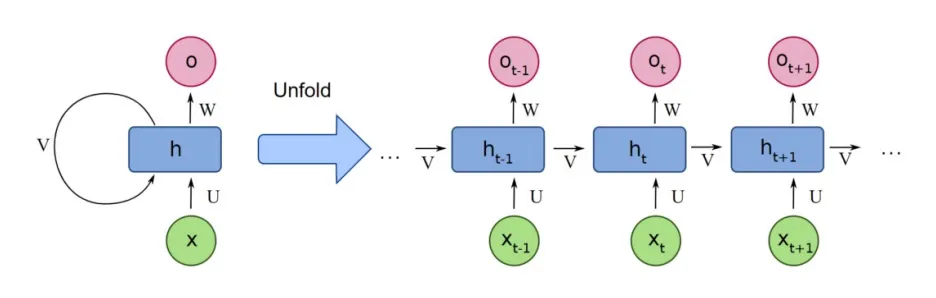

- 초록색은 입력층, 파란색은 은닉층, 분홍색은 출력층을 의미
- **정보 흐름**
    - **$t−1$  시점**: 입력 $x_{t-1}$이 들어가서 은닉 상태 $h_{t-1}$을 업데이트하고, 출력 $o_{t-1}$을 내보냅니다.
    - **$t$  시점**:  $t−1$ 시점에서 계산된 **은닉 상태 $h_{t-1}$이 다음 시점으로 그대로 전달**됩니다.
    - **새로운 입력** $xt$와 전달받은 **과거 정보** $h_{t-1}$을 함께 사용하여 **현재 시점의 은닉 상태** $ht$를 업데이트하고, **출력** $ot$를 계산합니다.

⇒ 은닉 상태(Hidden State)의 순환을 통해 과거의 정보를 다음 시점으로 계속해서 전달

<span style="color:#f993c0;"> RNN의 핵심 원리: 가중치 공유 </span>

- **동일한 가중치**를 시퀀스의 다양한 시점에서 **반복**적으로 적용
- RNN이 시퀀스 데이터의 **길이와 시점 위치에 상관없이** 효과적으로 작동하게 하는 핵심 원리

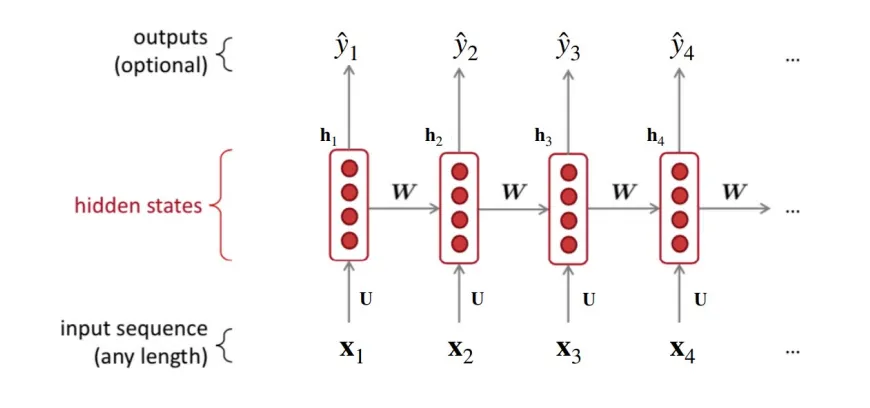

$X_1$을 처리할 때, $X_2$를 처리할 때, 그리고 $X_n$을 처리할 때까지 모두 동일한 파라미터(입력 가중치(U), 순환 가중치(W), 편향(b)) 를 공유하는 구조

가중치 공유의 이점

- **학습 파라미터의 수 감소**
    - 가중치를 공유하지 않을 경우
        
        ⇒ 시퀀스 길이가 길어질수록 **학습해야 할 파라미터가 무한정 늘어나서** 매우 비효율적이다.
        
    - 가중치 공유를 통해 RNN은 입력 시퀀스의 길이가 아무리 길어져도 **학습해야 할 파라미터의 수가 일정하게 유지된다.**
        
        ⇒ 모델을 더 빠르고 가볍게 만듦
        
- **일반화 능력 향상**
    - RNN은 “**이전 시점까지의 정보**와 **현재 시점의 입력**이 주어졌을 때, 어떻게 **상태(메모리)를 업데이트할 것인가?**”라는 **하나의 일반적 규칙**을 학습
        - ‘세 번째 데이터를 처리하는 규칙’, ‘다섯 번째 데이터를 처리하는 규칙’을 **각각 따로 배우는 것이 아니다.**
    - 훈련 데이터에 없던 **새로운 길이**의 시퀀스나 **다양한 패턴**에도 **유연하게 대응** 가능하다.

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> RNN의 한계 및 장기 의존성 문제 </span>

<span style="color:#f993c0;"> 한계 </span>

- RNN 구조의 특성 상 전체 시퀀스를 모두 읽은 후 역전파가 이루어짐
    
    ⇒ **역전파**를 구하는 과정에서 chain rule에 의해 다음 **미분값**이 반복적으로 곱해짐 (등비수열 형태)

1. **기울기 소실 (Vanishing Gradients)**

- 시퀀스 뒤쪽의 오차가 앞쪽까지 제대로 전달되지 않아 먼 과거의 정보를 학습하지 못하는 현상
- 역전파 과정에서 반복적으로 곱해지는 **기울기(미분값)의 크기가 1보다 작을 때**
    
    **⇒ 기울기가 0으로 수렴**

2. **기울기 폭주 (Exploding Gradients)**

- 시퀀스 뒤쪽의 오차가 역전파 과정에서 비정상적으로 커지는 문제
- 역전파 과정에서 반복적으로 곱해지는 **기울기(미분값)의 크기가 1보다 클 때**
    
    **⇒ 기울기가 무한대로 발산**

3. **느린 훈련 시간**

- 계산 과정이 순차적으로 이루어져야만 하는 구조적 한계
- $t$ 시점의 은닉 상태($h_t$)를 계산하려면 $t-1$ 시점의 은닉 상태($h_{t-1}$)가 먼저 계산되어야 한다.
    
    ⇒ 이 의존성 때문에 전체 시퀀스를 한 번에 병렬 처리 불가능

<span style="color:#f993c0;"> 장기 의존성 문제 </span>

시퀀스 앞 부분의 중요한 정보를 잊어버려 맥락 파악 능력이 급격히 저하되는 현상!
- 모델의 **‘단기 기억력’은 준수**했지만, **‘장기 기억력’에 문제** 발생

⇒ **새로운 모델**의 필요성 대두

- RNN의 **기억력 한계를 극복**
- **더 길고 복잡한 시퀀스 데이터를 안정적**으로 다룰 수 있는 새로운 대안
- **중요한 정보는 오래 기억**하고, **불필요한 정보는 잊는** 똑똑한 메모리 구조

## <span style="background-color:#F993C0; color:#311d26; padding:4px; border-radius:0px;"> LSTM & GPU </span>

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> LSTM </span>

앞의 정보가 뒤로 충분히 전달되지 못하는 RNN의 기울기 소실 문제를 해결하기 위한 모델 구조

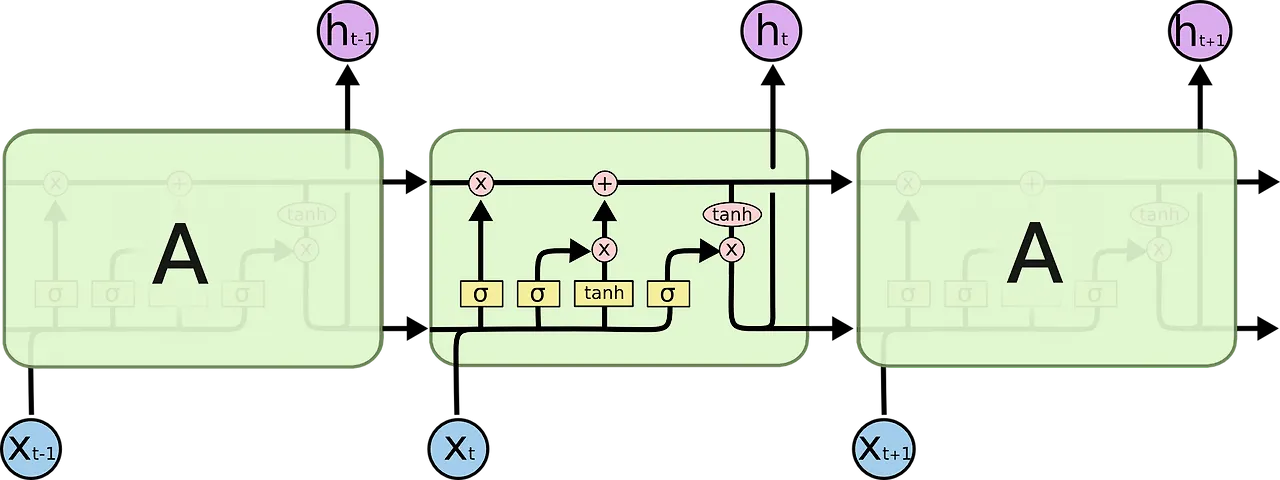

1. **핵심 아이디어**: **기억할 내용**과 **잊어버릴 내용**을 선택해서, **중요한 정보들을 오래** 가져간다.
    
    → “**GATE**”를 통해 곱셈을 덧셈으로 바꾼다.
    
2. **RNN과의 주요 차이:** $c_t\text{와}\space h_t$의 **2개의 순환되는 층**을 사용한다.(RNN에서는 $h_t$ 1개)
    - $c_t$(cell state): 장기 기억
    - $h_t$(hidden state): 단기 기억
3. **Gate를 통해 필요한 정보들만 통과** 
    - Forget gate: 정보를 **얼마나 잊어**버릴지 결정
    - Input gate: 현재 정보를 **얼마나 사용**할지 결정
    - Output gate: 다음 층으로 **어떤 정보를 전달**할지 결정 (hidden state를 만듦)
4. **Final memory cell:** Input, forget gate를 결합해 **현재 정보를 얼마나 기억할지 계산**

**LSTM의 장점 & 단점**

- **장점: Vanishing gradient problem 효과적으로 완화 (≠해결)**
    
    Gate를 통해 기억할 정보와 잊을 정보를 나눠서 관리함으로써, 이전의 정보가 중요하게 판단된다면, 완전히 보존되는 상태로 hidden state를 갱신해나갈 수 있기 때문
    
- **단점: (많이) 복잡한 구조, RNN보다 학습 파라미터가 많아짐**

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> GPU </span>

LSTM에서 조금 더 발전한 것으로 별도의 메모리 셀 없이 게이트 수를 줄여 구조를 간소화!

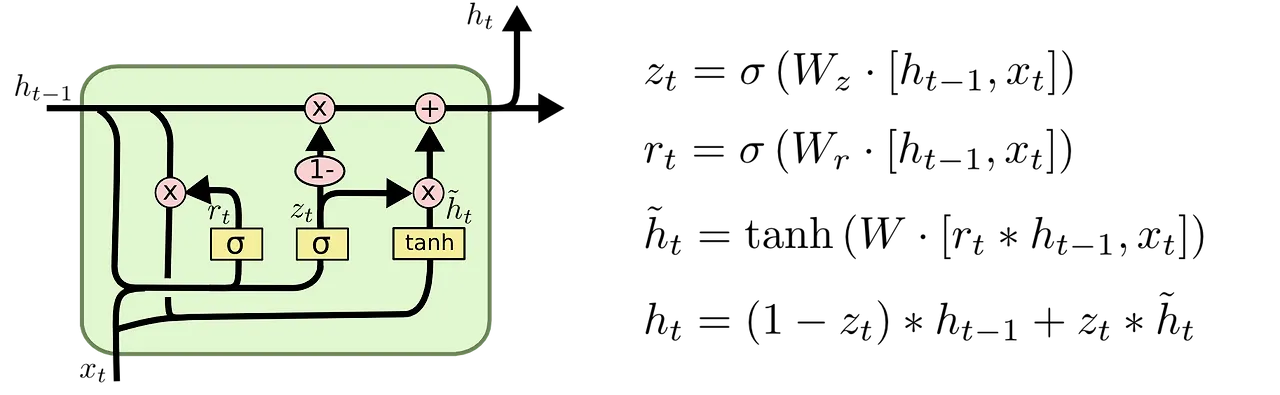

- Forget gate와 input gate를 **update gate 하나로 합침.**
- **Reset gate를 사용한다.**
- **Gate의 개수가 3개에서 2개로** 줄어 학습 시간이 줄어듦
    
    → 학습 시간은 줄어들지만 성능은 LSTM과 유사하거나 더 좋다

- **장점: 성능과 효율성 사이의 균형이 좋다**
- **단점: 긴 시퀀스 처리에서의 한계는 여전히 존재**

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> LSTM vs GPU </span>

| 구분 | LSTM | GRU |
| --- | --- | --- |
| **구조** | 3개 게이트 (입력, 삭제, 출력) | 2개 게이트 (업데이트, 리셋) |
| **복잡도** | 더 복잡, 파라미터 수 많음 | 단순, 파라미터 수 적음 |
| **학습 속도** | 느림 (계산량 많음) | 빠름 (계산량 적음) |
| **메모리 사용량** | 큼 | 작음 |
| **장기 의존성 처리** | 더 강력 | LSTM과 비교해 다소 약함 |
| **연구/사례 축적** | 매우 많음 | 비교적 적음 (최근 등장) |
| **성능** | 데이터가 충분하고 문제 복잡성이 높을 때 강력 | 데이터가 적거나 효율성이 중요할 때 유리 |

- **LSTM 적합한 경우**
    - 긴 시퀀스에서 문맥 이해가 중요한 작업
    - 데이터 양이 충분하고 복잡한 패턴을 학습해야 하는 경우
    - 모델 성능이 계산 효율보다 더 중요한 경우
    - 기계 번역, 언어 모델링, 장기 시계열 예측 (예: 금융, 기후 데이터)
- **GRU 적합한 경우**
    - 자원이 제한적이거나 학습 속도가 중요한 경우
    - 데이터 양이 적고 과적합 위험이 있는 경우
    - 실시간 예측이 필요한 응용
    - 사용 예시: 음성 인식, 스트리밍 데이터, 실시간 비디오 분석, 짧은 시퀀스 기반의 텍스트 분류

## <span style="background-color:#F993C0; color:#311d26; padding:4px; border-radius:0px;"> Seq2Seq </span>

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> Seq2Seq의 기본 구조 </span>

<span style="color:#f993c0;"> Seq2Seq </span>

한 시퀀스를 다른 시퀀스로 변환하는 작업을 수행하는 딥러닝 모델로, 대표적으로 기계번역에서 사용됨!

특징
- 아이템(단어)의 입력 개수와 출력 개수가 같지 않아도 됨
- 인코더와 디코더라는 모듈을 가지고 있어, Encoder-Decoder 모델이라고도 불림

<span style="color:#f993c0;"> 인코더와 디코더란? </span>

**인코더 (Encoder)**

: 입력된 시퀀스를 읽고 압축하여 디코더에게 넘겨줄 문맥 정보 준비 (원문의 특징 파악)

⇒ 여기서 압축된 정보는 컨텍스트 벡터(context vector)라고 한다. 

- 인코더에서는 **t 시점의 임베딩된 단어의 입력**과 **t-1 시점의 은닉 상태(hidden state)**가 RNN/LSTM의 입력으로 주어지며, 그 결과로 **t시점의 은닉 상태**가 나온다.

**디코더 (Decoder)**

: 압축된 정보를 바탕으로 원하는 시퀀스를 생성. (번역문 생성)

- 기본적인 seq2seq에서는, 인코더가 보내준 컨텍스트 벡터는 디코더의 **첫번째 은닉 상태**에 사용된다.

- t시점에 나온 출력값이 그 다음 시점의 입력값으로 넘어간다

#### <span style="background-color:#633a4c; color:#fde9f2; padding:4px; border-radius:0px;"> Seq2Seq의 한계: 병목 현상 </span>

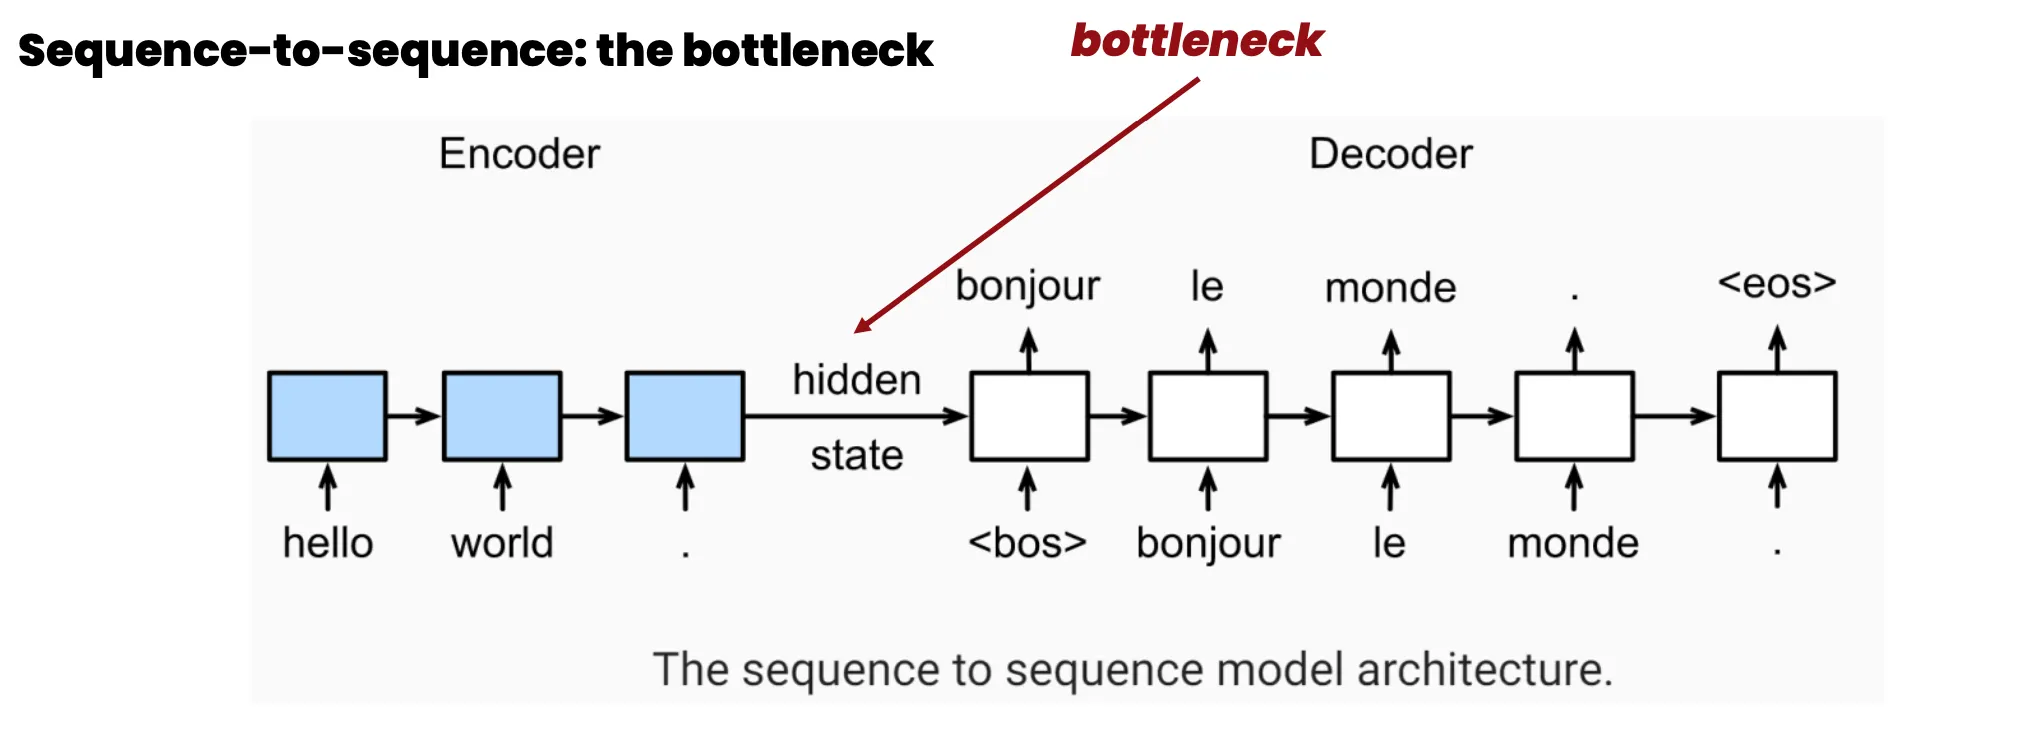

**고정된 Context Vector**에 소스 문장의 정보 압축 → **병목 현상 발생!!**

- 긴 문장의 모든 정보를 하나의 컨텍스트 벡터로 압축할 때 정보가 손실
- 고정된 길이에 입력 시퀸스의 모든 정보를 담지 못하고 손실될 수 있다.
- 특히 긴 입력 시퀸스의 경우 정보 손실이 더 심각하며, 이는 모델 성능 하락으로 이어진다.